In [1]:
import sys
sys.path.append( "/home/peer/PycharmProjects/neslearng")

In [2]:
import pandas
from hsa.ba.analyse_ram import ram_from_movie
# from hsa.ba.rewards import time_left, make_delta_potential
import hsa.ba.rewards as rewards
import importlib

In [51]:
importlib.reload(rewards)

<module 'hsa.ba.rewards' from '/home/peer/PycharmProjects/neslearng/hsa/ba/rewards.py'>

In [4]:
%matplotlib notebook

In [5]:
movies = {}

In [25]:
movies[5] = pandas.DataFrame(ram_from_movie("../../movies/5_1-1_without-shortcut.fm2"))

In [26]:
movies[6] = pandas.DataFrame(ram_from_movie("../../movies/6_1-1_with_shortcut.fm2"))

In [7]:
# /home/peer/PycharmProjects/neslearng/movies/7_1-1_death_and_checkpoint_no_shortcut.fm2
movies[7] = pandas.DataFrame(ram_from_movie("../../movies/7_1-1_death_and_checkpoint_no_shortcut.fm2"))

In [44]:
# /home/peer/PycharmProjects/neslearng/movies/8_1-1_death_and_shortcut.fm2
movies[8] = pandas.DataFrame(ram_from_movie("../../movies/8_1-1_death_and_shortcut.fm2"))

In [17]:
# /home/peer/PycharmProjects/neslearng/movies/9_1-1_death_in_shortcut.fm2
movies[9] = pandas.DataFrame(ram_from_movie("../../movies/9_1-1_death_in_shortcut.fm2"))

In [40]:
delta_potential = rewards.make_delta_potential()

def reward_func(ram):
    return {"delta_potential": delta_potential(ram),
            "time_left": rewards.reward_for_time_left(ram)/10#,
            #"current_screen": ram[0x071A],
            #"playerstate": ram[0x000E]
           }

def rewards_from_frame(df):
    return pandas.DataFrame.from_dict((reward_func(ram) for index, ram in df.iterrows()))

<IPython.core.display.Javascript object>


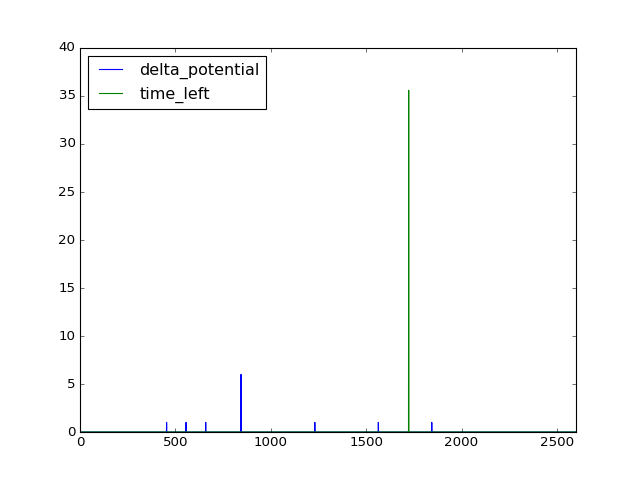

In [41]:
rewards_from_frame(movies[6]).plot()

<IPython.core.display.Javascript object>


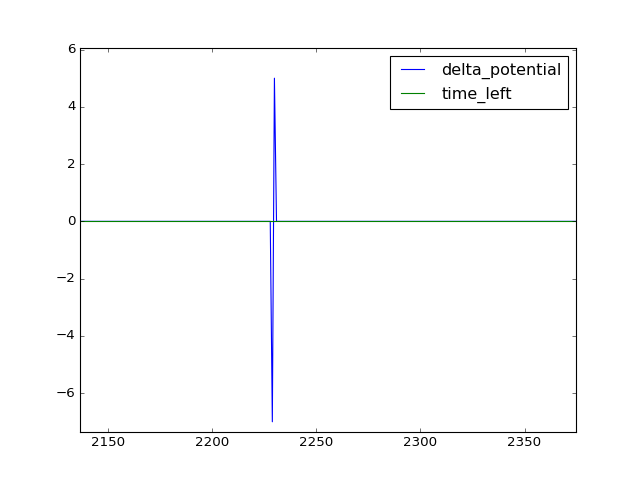

In [45]:
rewards_from_frame(movies[7]).plot()

Note the behavior for checkpoints.
Going down to the start of the level, and then going back up for being teleport forward to the middle

## Main reward function

In [48]:
def main_reward_series(df):
    main_reward = rewards.make_main_reward()
    return pandas.Series((main_reward(ram) for index, ram in df.iterrows()))

<IPython.core.display.Javascript object>


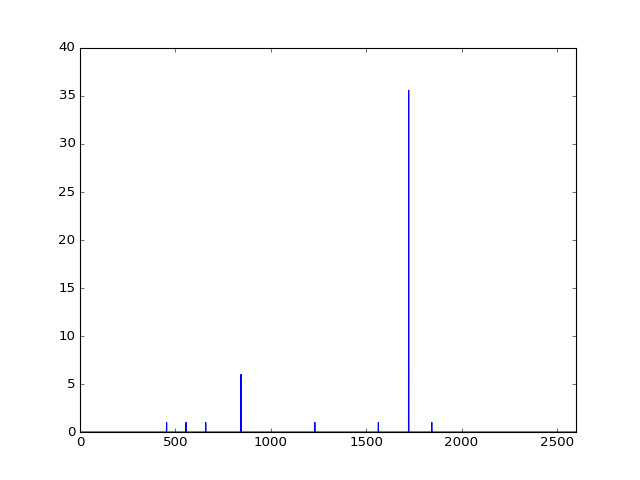

In [52]:
main_reward_series(movies[6]).plot()